# Stage 3: Data Processing <a class="anchor" id="top"></a>

Now that we have completed our Exploratory Data Analysis (EDA), let us process and prepare our data set for training. 

### Navigation
> ### [1. Checking Class Distribution of Delayed Flights To Non-Delayed Flights](#first-bullet)
> ### [2. Employing Resampling Techniques](#second-bullet)
> ### [3. Encoding Categorical Variables](#third-bullet)
> ### [4. Exporting CSV](#fourth-bullet)


---

### Essential Libraries

Let us import the necessary Python libraries.

> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
randomStateNumber = 1

Here, we have a helper function `printClassBalance` to show the class distribution of delayed and non-delayed flights.

In [2]:
# Prints the frequency and percentage
def printClassBalance(col):
    col = col.rename(index={0.0: 'Non-Delayed', 1.0: 'Delayed'})   
    class_counts = col.value_counts()
    class_percentages = col.value_counts(normalize=True) * 100
    print("Shape: ", col.shape)
    print(class_counts)
    print(class_percentages)
    plt.figure(figsize=(8, 6))

    bars = plt.bar(['Non Delayed Flight', 'Delayed Flight'], class_percentages, color=['lightblue', 'salmon'])

    # Displaying count numbers on top of each ba
    i = 0
    for rect in bars:
        plt.text(rect.get_x() + rect.get_width() * 0.50,  rect.get_height() * 0.50, str(class_percentages[i]), ha='center')
        i+=1
    plt.title('Percentage Distribution of Delayed vs Non-Delayed Flights')
    plt.xlabel('Total Flights')
    plt.ylabel('Percentage (%)')
    plt.show()

Here, we read the dataset `cleaned_dataset.csv` that has cleaned up previously in our EDA, with NAN values and outliers removed and select features that we have identified previously.

**Features (7)**
> DayOfMonth : Categorical   
> DayOfWeek : Categorical    
> Operating_Airline : Categorical   
> Origin : Categorical    
> Dest : Categorical   
> DistanceGroup : Categorical   
> Hour : Categorical (Extracted from CRSDepTime)   

**Labels**
> DepDelay15 : 1 (Delayed) or 0 (Non-Delayed)  

In [3]:
# Read data
df = pd.read_csv('data/cleaned_dataset.csv')

# All features fed into the training model
features = ['DayOfMonth','DayOfWeek', 'OperatingAirline', 'Origin', 'Dest', 'DistanceGroup', 'Hour']

# All categorical features that has to be encoded.
categorical_features = ['DayOfMonth','DayOfWeek', 'OperatingAirline', 'Origin', 'Dest', 'DistanceGroup', 'Hour']
label = "DepDel15"


df_features = df[features]
df_labels = df[[label]]
df_input = pd.concat([df_features, df_labels], axis=1)

df_input.head(10)

,DayOfMonth,DayOfWeek,OperatingAirline,Origin,Dest,DistanceGroup,Hour,DepDel15
0,19,2,OH,DCA,TUL,5,20,0.0
1,20,3,OH,DCA,TUL,5,20,1.0
2,21,4,OH,DCA,TUL,5,20,0.0
3,24,7,OH,DCA,TUL,5,20,0.0
4,26,2,OH,DCA,TUL,5,20,0.0
5,27,3,OH,DCA,TUL,5,20,0.0
6,28,4,OH,DCA,TUL,5,20,0.0
7,31,7,OH,DCA,TUL,5,20,0.0
8,1,5,OH,CLT,SGF,3,16,0.0
9,2,6,OH,CLT,SGF,3,16,0.0


---

## 1. Checking Class Distribution of Delayed and Non-Delayed Flights <a class="anchor" id="first-bullet"></a>

Shape:  (532423, 1)
DepDel15
0.0         462690
1.0          69733
Name: count, dtype: int64
DepDel15
0.0         86.902707
1.0         13.097293
Name: proportion, dtype: float64


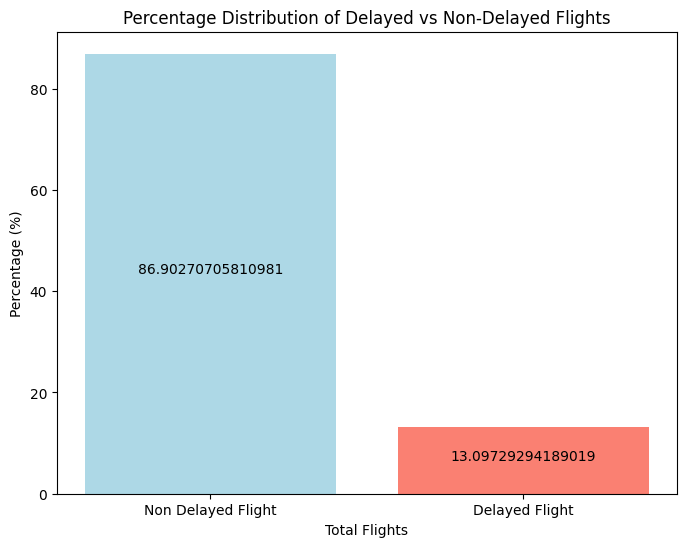

In [4]:
printClassBalance(df_labels)

<div class="alert alert-block alert-info">
    The data set is <b>imbalanced!</b> We observe that <b>86.9%</b> of the flights are non-delayed and only <b>13.1%</b> of flights are delayed.

Total: 532423 (100.0%)<br>
Delayed: 462690 (86.9%)<br>
Non-Delayed: 69733 (13.1%)
</div>


Having an imbalanced dataset could lead to bias towards the majority class as high accuracy could be achieved simply by predicting the majority class most or all of the time, ignoring the minority class completely, also known as `majority class bias`.

While there are training models that are more robust to class imbalance, models trained on such data could have poor generalisation as well. 

To test out our hypothesis, we will export two versions of the dataset, one with resampling and another without and train models on both.

For resampling, we could employ techniques like `DownSampling` and `RandomOversampling`. Given that our dataset already has `532423 entries`, we decide to employ `DownSampling` as we will still have a substantial amount of data remaining for the model to train on without fear of losing meaningful information, while reducing the complexity of the model.

---

## 2. Balancing Dataset via DownSampling (prune majority classes) <a class="anchor" id="second-bullet"></a> 

To address the imbalanced data set, we employ `DownSampling` to prune the majority class. This ensures a balanced data set for our AI models to train on.

Shape:  (139466,)
DepDel15
1.0    69733
0.0    69733
Name: count, dtype: int64
DepDel15
1.0    50.0
0.0    50.0
Name: proportion, dtype: float64


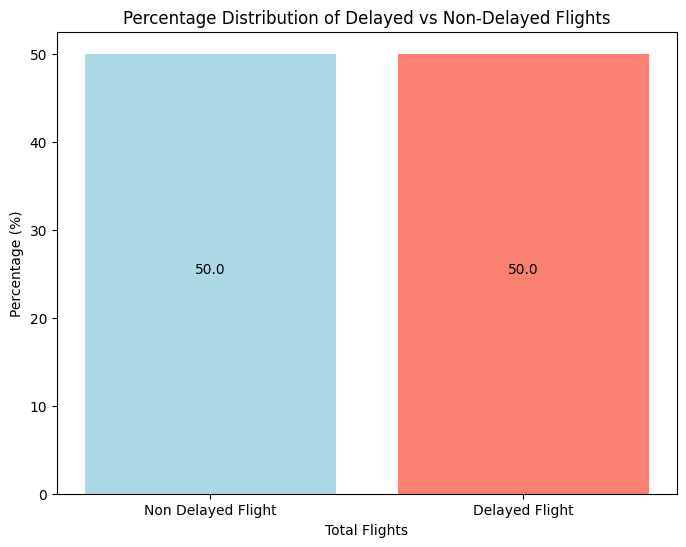

In [5]:
delayed = df_input[df[label] == 1.0]
not_delayed = df_input[df[label] == 0.0]

# Downsample the majority class ('not_delayed') to match the minority class ('delayed')
not_delayed_downsampled = not_delayed.sample(n=len(delayed), random_state=randomStateNumber)

# Concatenate the downsampled majority class with the minority class
df_downsampled = pd.concat([not_delayed_downsampled, delayed])

# Shuffle the resulting DataFrame to randomize the order of rows
df_downsampled = df_downsampled.sample(frac=1, random_state=randomStateNumber).reset_index(drop=True)

printClassBalance(df_downsampled[label])

<div class="alert alert-block alert-success">
    The dataset is now balanced to <b>50%</b> with <b>69733</b> entries each in delayed and non-delayed by pruning the non-delayed flights.

Total: 139466 (100.0%)<br>
Delayed: 69733 (50.0%)<br>
Non-Delayed: 69733 (50.0%)
</div>

---

## 3. Encoding Categorical Variables <a class="anchor" id="third-bullet"></a>

To feed categorical variables into our model meaningfully, we have to first convert it into numerical format. 

The top 2 common ways of encoding are `One-Hot Encoding` and `Ordinal Encoding`.

`One-Hot Encoding` represents each category as a binary vector where each dimension corresponds to a category, and only one dimension is "hot" (1) while the others are "cold" (0). 

`Ordinal Encoding` assigns a unique integer to each category based on a certain order or hierarchy.

Using `Ordinal Encoding` could **potentially introduce unintentional relationships or biases** here as the categories we have selected (DistanceGroup, Operating_Airline, Hour) are distinct and unrelated. Meaning, there isn't a prioritised `Hour` or a better `Operating_Airline` by nature. 

Therefore we will use `One-Hot Encoding`.


In [6]:
# Define our very own one-hot-encode function
def one_hot_encode(df_input, categorical_features):
    all_dummies = []
    for col in categorical_features:
        # Generate new categories, and also prefix with the original category's label to differentiate numerical only columns
        dummies = pd.get_dummies(df_input[col], prefix=col)
        all_dummies.append(dummies) 
    # Drop the original category features and add the new dummy categories
    return pd.concat([df_input] + all_dummies, axis=1).drop(columns=categorical_features)

In [7]:
df_original_encoded = one_hot_encode(df_input, categorical_features)
df_downsampled_encoded = one_hot_encode(df_downsampled, categorical_features)

print("Original Shape: ", df_input.shape)
print("Original Encoded Shape: ", df_original_encoded.shape)

print("Downsampled Shape: ", df_downsampled.shape)
print("Downsampled Encoded Shape: ", df_downsampled_encoded.shape)

Original Shape:  (532423, 8)
Original Encoded Shape:  (532423, 831)
Downsampled Shape:  (139466, 8)
Downsampled Encoded Shape:  (139466, 831)



<div class="alert alert-block alert-success">
<b>  Success! </b> The 8 categorical columns has been one-hot encoded into 831 columns.
</div>

---

## 4. Exporting CSV <a class="anchor" id="fourth-bullet"></a>

Now that we have prepared our data, it is now ready to be fed to our model for training. We will compare the performance of our models on both datasets in the next section.

File names:
> Processed data without resampling: `processed_dataset.csv`   
> Processed data with resampling: `processed_dataset_resampled.csv`   

In [8]:
df_original_encoded.to_csv('data/processed_dataset.csv', index=False)
df_downsampled_encoded.to_csv('data/processed_dataset_resampled.csv', index=False)

---

<center><h3><b>Next Chapter: Training ML Models</b></h3></center>

<center><h3><a href="#top">Scroll To Top </a></h3></center>